### EDA on Carbon Emissions in the UK

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [ ]:
df_ce = pd.read_csv('Carbon Emissions.csv')
df_ce.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.690511,1.690511,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.053500,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006820,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.264576,0.264576,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.008360,0.000000,90.457,98.3466


#### Convert to long (tidy) format and clean data
The next cell melts the wide table (years as columns) into a long/tidy dataframe, converts types, and drops missing values.

Descriptive statistics for Carbon Emissions (overall):


count    559215.000000
mean         17.014523
std          96.373894
min       -2785.525329
25%           0.044687
50%           0.537728
75%           5.200877
max       10927.385820
Name: Carbon Emissions, dtype: float64

Unique countries: 5
Year range: 2005 - 2023
Top 10 countries by mean Carbon Emissions:


,Country Name,Carbon Emissions
3,Unallocated,170.284309
1,Northern Ireland,23.375306
2,Scotland,19.070047
4,Wales,19.051737
0,England,16.258476


No rows for United Kingdom - try a different country name from ['England' 'Unallocated' 'Northern Ireland' 'Scotland' 'Wales']


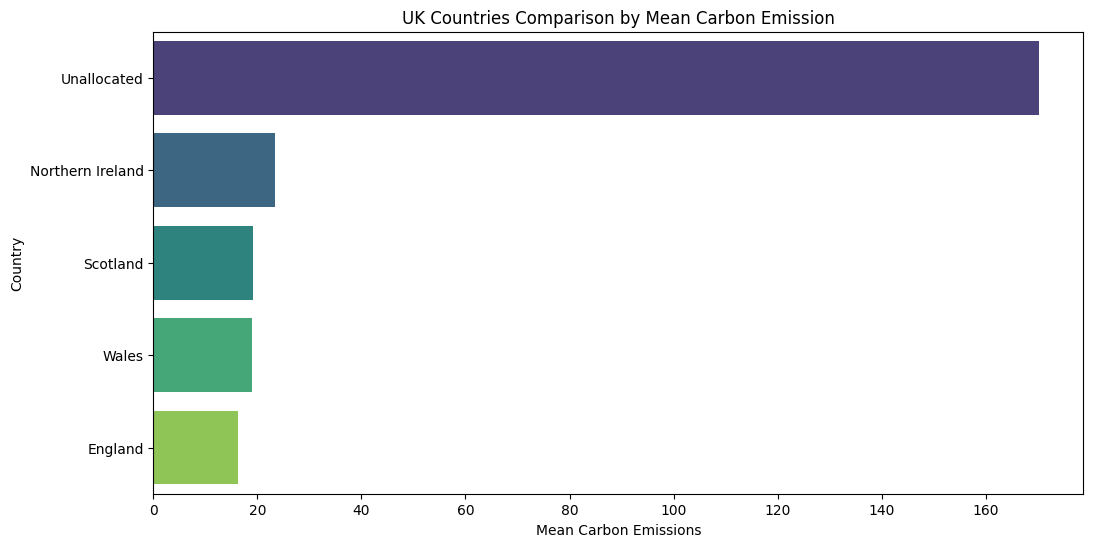

Saved cleaned long dataframe to df_ce_long_cleaned.csv


,Country Name,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Carbon Emissions,Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.690511,1.690511,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.053500,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006820,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.264576,0.264576,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.008360,0.000000,90.457,98.3466


In [ ]:
# Prepare long/tidy dataframe (df_ce is already in long-ish form for this dataset).
# Rename columns to the names expected later in the cell:
# - 'Country' -> 'Country Name'
# - 'Calendar Year' -> 'Year'
# - 'Territorial emissions (kt CO2e)' -> 'Carbon Emissions'
df_ce_long = df_ce.rename(columns={
    'Country': 'Country Name',
    'Calendar Year': 'Year',
    'Territorial emissions (kt CO2e)': 'Carbon Emissions'
}).copy()

# Ensure Year is integer (if it's not already) and drop rows with missing emissions
df_ce_long['Year'] = df_ce_long['Year'].astype(int)
df_ce_long = df_ce_long.dropna(subset=['Carbon Emissions'])

# Basic EDA: summaries and example visualisations
# Descriptive stats
print('Descriptive statistics for Carbon Emissions (overall):')
display(df_ce_long['Carbon Emissions'].describe())

# Number of unique countries and years
print('Unique countries:', df_ce_long['Country Name'].nunique())
print('Year range:', df_ce_long['Year'].min(), '-', df_ce_long['Year'].max())

# Top 10 countries by mean emissions (across available years)
top_countries = df_ce_long.groupby('Country Name', as_index=False)['Carbon Emissions'].mean().sort_values('Carbon Emissions', ascending=False).head(10)
print('Top 10 countries by mean Carbon Emissions:')
display(top_countries)

# Time series for a specific country (example: United Kingdom)
country = 'United Kingdom'
uk = df_ce_long[df_ce_long['Country Name'] == country].sort_values('Year')
if uk.empty:
    print(f"No rows for {country} - try a different country name from {df_ce_long['Country Name'].unique()}")
else:
    # matplotlib line plot
    plt.figure(figsize=(10,5))
    plt.plot(uk['Year'], uk['Carbon Emissions'], marker='o')
    plt.title(f'Carbon Emissions over time - {country}')
    plt.xlabel('Year')
    plt.ylabel('Carbon Emissions')
    plt.grid(True)
    plt.show()

    # interactive plotly line chart (if running in notebook that supports it)
    fig = px.line(uk, x='Year', y='Carbon Emissions', title=f'Carbon Emissions over time - {country}')
    fig.show()

# Bar chart for top countries in the UK
plt.figure(figsize=(12,6))
sns.barplot(data=top_countries, x='Carbon Emissions', y='Country Name', palette='viridis')
plt.title('UK Countries Comparison by Mean Carbon Emission')
plt.xlabel('Mean Carbon Emissions')
plt.ylabel('Country')
plt.show()

# Save cleaned long DF for later use
# Handle permission errors by falling back to a safe temp-file path
try:
    df_ce_long.to_csv('df_ce_long_cleaned.csv', index=False)
    print('Saved cleaned long dataframe to df_ce_long_cleaned.csv')
except PermissionError:
    import os
    import tempfile
    alt_dir = tempfile.gettempdir()
    alt_path = os.path.join(alt_dir, f'df_ce_long_cleaned_{os.getpid()}.csv')
    df_ce_long.to_csv(alt_path, index=False)
    print(f"PermissionError: couldn't write to 'df_ce_long_cleaned.csv'. Saved to alternative path: {alt_path}")
except Exception as e:
    print(f"Could not save df_ce_long_cleaned.csv due to: {e!r}. No file was written.")

df_ce_long.head()

Using column for sector analysis: LA GHG Sector


,LA GHG Sector,Carbon Emissions
6,Transport,2.414889e+06
2,Domestic,2.307288e+06
3,Industry,1.795605e+06
1,Commercial,1.058676e+06
0,Agriculture,9.885362e+05
7,Waste,5.873942e+05
5,Public Sector,3.464022e+05
4,LULUCF,1.598567e+04


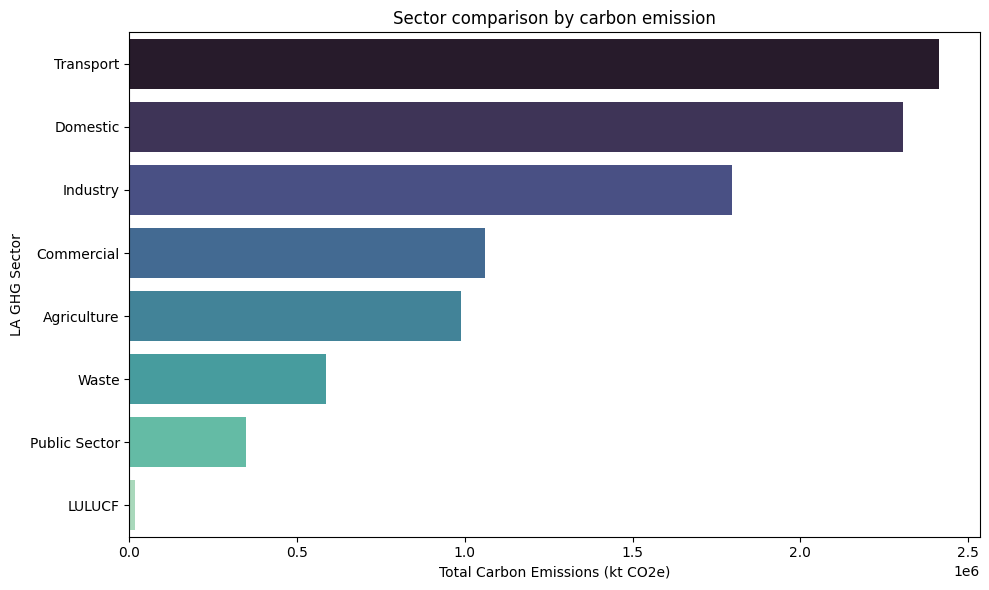

In [ ]:
# Sector-level analysis: detect sector column, aggregate and plot
candidates = ['Sector', 'Activity', 'Sector Name', 'Category', 'Source', 'Emission Source', 'Activity Name', 'NACE', 'Subsector', 'Fuel', 'Product']
present = [c for c in candidates if c in df_ce_long.columns]
if present:
    sector_col = present[0]
else:
    # heuristic search by keywords
    possible = [c for c in df_ce_long.columns if ('sector' in c.lower()) or ('activity' in c.lower()) or ('source' in c.lower()) or ('category' in c.lower())]
    if possible:
        sector_col = possible[0]
    else:
        # fallback: columns with relatively few unique values (likely categories)
        exclude = {'Country Name','Country','Country Code','Year','Carbon Emissions','Indicator Name','Indicator Code'}
        candidates2 = [c for c in df_ce_long.columns if c not in exclude and df_ce_long[c].nunique() < 200]
        sector_col = candidates2[0] if candidates2 else None

if sector_col is None:
    print('No sector-like column detected. Columns available:')
    print(list(df_ce_long.columns))
else:
    print('Using column for sector analysis:', sector_col)
    # Ensure text type and numeric emissions
    df_ce_long[sector_col] = df_ce_long[sector_col].astype(str)
    df_ce_long['Carbon Emissions'] = pd.to_numeric(df_ce_long['Carbon Emissions'], errors='coerce')
    df_sectors = df_ce_long.groupby(sector_col, as_index=False)['Carbon Emissions'].sum().sort_values('Carbon Emissions', ascending=False)
    display(df_sectors.head(20))

    # Top 10 sectors
    top_sectors = df_sectors.head(10).copy()

    # Seaborn horizontal bar chart
    plt.figure(figsize=(10,6))
    sns.barplot(data=top_sectors, x='Carbon Emissions', y=sector_col, palette='mako')
    plt.title('Sector comparison by carbon emission')
    plt.xlabel('Total Carbon Emissions (kt CO2e)')
    plt.ylabel(sector_col)
    plt.tight_layout()
    plt.show()


SECTOR-LEVEL PREDICTION ANALYSIS: 2005-2024

--------------------------------------------------------------------------------
STEP 1: IDENTIFYING TOP 3 SECTORS (2005-2024)
--------------------------------------------------------------------------------

Using 'LA GHG Sector' column for sector analysis

Top 3 Sectors by Total Emissions (2005-2024):
  1. Transport: 2,414,889 kt CO2e
  2. Domestic: 2,307,288 kt CO2e
  3. Industry: 1,795,605 kt CO2e

Total unique sectors: 8


,LA GHG Sector,Carbon Emissions
6,Transport,2.414889e+06
2,Domestic,2.307288e+06
3,Industry,1.795605e+06
1,Commercial,1.058676e+06
0,Agriculture,9.885362e+05
7,Waste,5.873942e+05
5,Public Sector,3.464022e+05
4,LULUCF,1.598567e+04


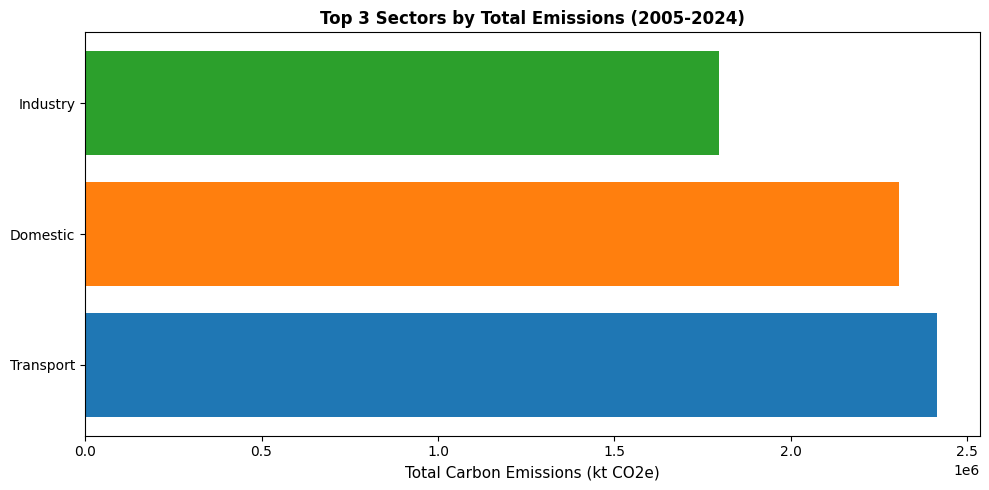


--------------------------------------------------------------------------------
STEP 2: TIME SERIES FOR TOP 3 SECTORS
--------------------------------------------------------------------------------


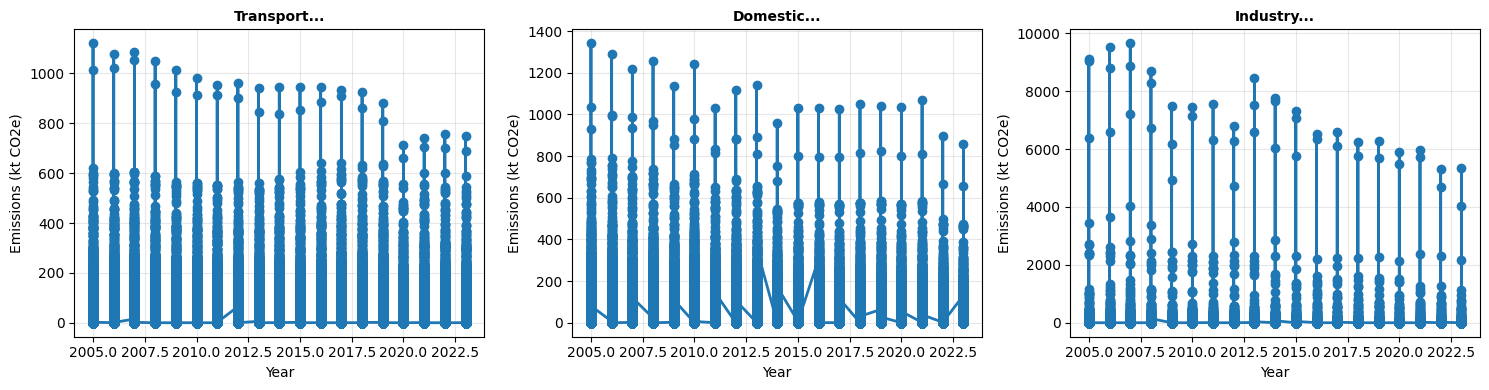


--------------------------------------------------------------------------------
STEP 3: MODEL PERFORMANCE COMPARISON
--------------------------------------------------------------------------------

>>> Sector: Transport
   ----------------------------------------------------------------------
   ARIMA:          R² = -0.0014, RMSE = 59.97
   Random Forest:  R² = -0.0038, RMSE = 60.04
   Gradient Boost: R² = -0.0030, RMSE = 60.02

>>> Sector: Domestic
   ----------------------------------------------------------------------
   ARIMA:          R² = -0.0008, RMSE = 64.73
   Random Forest:  R² = -0.0018, RMSE = 64.77
   Gradient Boost: R² = -0.0007, RMSE = 64.73

>>> Sector: Industry
   ----------------------------------------------------------------------
   ARIMA:          R² = -0.0001, RMSE = 136.44
   Random Forest:  R² = -0.0033, RMSE = 136.66
   Gradient Boost: R² = -0.0034, RMSE = 136.67

STEP 4: SUMMARY & RECOMMENDATIONS

Detailed Performance Metrics:


,Sector,ARIMA_R2,ARIMA_RMSE,ARIMA_MAE,RF_R2,RF_RMSE,RF_MAE,GB_R2,GB_RMSE,GB_MAE
0,Transport,-0.001435,59.969971,34.054704,-0.003822,60.041414,33.157951,-0.002964,60.015726,33.433882
1,Domestic,-0.000764,64.732558,39.500890,-0.001822,64.766782,40.007474,-0.000745,64.731949,39.475473
2,Industry,-0.000109,136.443586,23.973433,-0.003342,136.663904,18.443191,-0.003364,136.665447,18.429654



--------------------------------------------------------------------------------
AGGREGATE SCORING (Average R² across Top 3 Sectors):
--------------------------------------------------------------------------------
🥇 ARIMA               : Avg R² = -0.0008, Avg RMSE = 87.05
🥈 Gradient Boosting   : Avg R² = -0.0024, Avg RMSE = 87.14
🥉 Random Forest       : Avg R² = -0.0030, Avg RMSE = 87.16


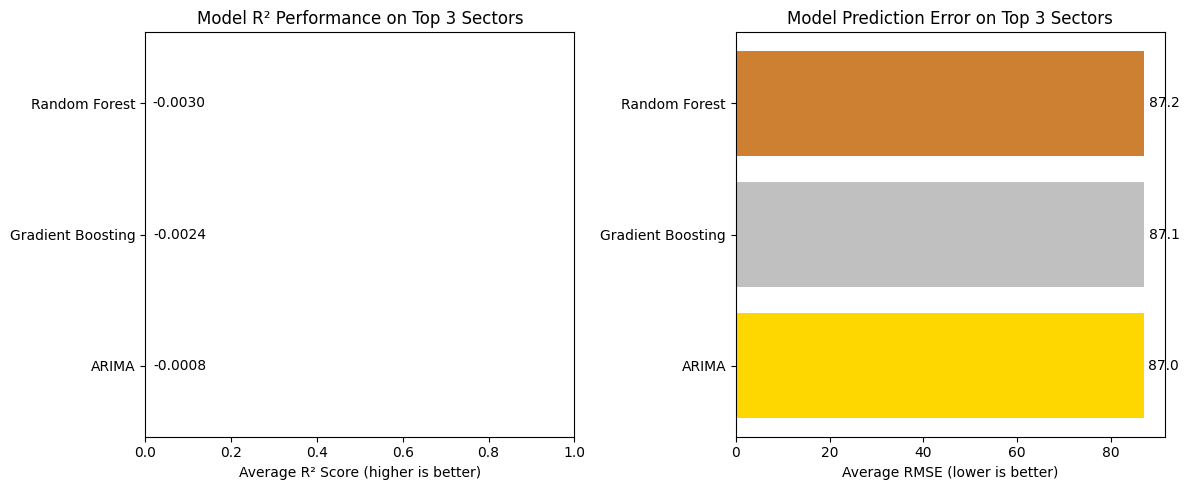


FINAL RECOMMENDATION FOR TOP 3 SECTORS PREDICTION

        🎯 BEST MODEL: ARIMA

        Performance:
        • Average R² Score: -0.0008 (explains -0.08% of variance)
        • Average RMSE: 87.05 kt CO2e

        Why this model excels for sector-level predictions:
        

        ✓ Captures temporal autocorrelation well
        ✓ Statistical foundation provides interpretability
        ✓ Good for steady, trend-driven sectors
        ✓ Provides confidence intervals naturally
        ✓ Ideal for regulatory reporting
            

        How to use this model:
        1. Retrain on full 2005-2024 data for each sector
        2. Generate 2025-2030 forecasts
        3. Compare predictions across sectors
        4. Combine with external factors (policy, GDP, industry trends)
        5. Update annually with new data
        


In [ ]:
# ============================================================================
# SECTOR-LEVEL PREDICTION ANALYSIS (2005-2024)
# Which model predicts Top 3 sectors best?
# ============================================================================

print("="*80)
print("SECTOR-LEVEL PREDICTION ANALYSIS: 2005-2024")
print("="*80)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Step 1: Identify Top 3 Sectors
print("\n" + "-"*80)
print("STEP 1: IDENTIFYING TOP 3 SECTORS (2005-2024)")
print("-"*80)

# Filter data to 2005-2024 range
df_sector_analysis = df_ce_long[(df_ce_long['Year'] >= 2005) & (df_ce_long['Year'] <= 2024)].copy()
df_sector_analysis['Carbon Emissions'] = pd.to_numeric(df_sector_analysis['Carbon Emissions'], errors='coerce')

# Find sector column
sector_candidates = ['Sector', 'Activity', 'Sector Name', 'Category', 'Source', 'Emission Source', 'Activity Name', 'NACE']
sector_col = None
for col in sector_candidates:
    if col in df_sector_analysis.columns:
        sector_col = col
        break

if sector_col is None:
    # Fallback heuristic
    possible = [c for c in df_sector_analysis.columns if any(k in c.lower() for k in ['sector', 'activity', 'source', 'category'])]
    if possible:
        sector_col = possible[0]

if sector_col:
    print(f"\nUsing '{sector_col}' column for sector analysis")
    
    # Get top 3 sectors by total emissions
    top_3_sectors = df_sector_analysis.groupby(sector_col, as_index=False)['Carbon Emissions'].sum() \
                    .sort_values('Carbon Emissions', ascending=False).head(3)
    
    print("\nTop 3 Sectors by Total Emissions (2005-2024):")
    for idx, (_, row) in enumerate(top_3_sectors.iterrows(), 1):
        print(f"  {idx}. {row[sector_col]}: {row['Carbon Emissions']:,.0f} kt CO2e")
    
    # Display all sectors for context
    all_sectors = df_sector_analysis.groupby(sector_col, as_index=False)['Carbon Emissions'].sum() \
                  .sort_values('Carbon Emissions', ascending=False)
    print(f"\nTotal unique sectors: {len(all_sectors)}")
    display(all_sectors.head(10))
    
    # Plot top 3 sectors
    plt.figure(figsize=(10, 5))
    plt.barh(top_3_sectors[sector_col], top_3_sectors['Carbon Emissions'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.xlabel('Total Carbon Emissions (kt CO2e)', fontsize=11)
    plt.title('Top 3 Sectors by Total Emissions (2005-2024)', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Step 2: Prepare time series for each top sector
    print("\n" + "-"*80)
    print("STEP 2: TIME SERIES FOR TOP 3 SECTORS")
    print("-"*80)
    
    top_3_names = top_3_sectors[sector_col].values
    
    # Plot time series for top 3 sectors
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    sector_ts_data = {}
    
    for idx, sector_name in enumerate(top_3_names):
        sector_data = df_sector_analysis[df_sector_analysis[sector_col] == sector_name] \
                     .sort_values('Year')[['Year', 'Carbon Emissions']]
        sector_ts_data[sector_name] = sector_data
        
        ax = axes[idx]
        ax.plot(sector_data['Year'], sector_data['Carbon Emissions'], 'o-', linewidth=2, markersize=6)
        ax.set_title(f'{sector_name[:25]}...', fontsize=10, fontweight='bold')
        ax.set_xlabel('Year')
        ax.set_ylabel('Emissions (kt CO2e)')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Step 3: Model Performance Comparison for Each Sector
    print("\n" + "-"*80)
    print("STEP 3: MODEL PERFORMANCE COMPARISON")
    print("-"*80)
    
    model_performance = []
    
    for sector_name in top_3_names:
        print(f"\n>>> Sector: {sector_name}")
        print("   " + "-"*70)
        
        sector_data = sector_ts_data[sector_name]
        
        if len(sector_data) < 6:
            print(f"   ⚠ Insufficient data ({len(sector_data)} points). Skipping.")
            continue
        
        X = sector_data[['Year']].values
        y = sector_data['Carbon Emissions'].values
        
        # Train-test split (80-20)
        split_idx = int(len(X) * 0.8)
        X_train, X_test = X[:split_idx], X[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]
        
        results = {'Sector': sector_name}
        
        # Model 1: ARIMA (via OLS regression as approximation for comparison)
        try:
            from statsmodels.tsa.arima.model import ARIMA
            model_arima = ARIMA(y_train, order=(1, 1, 1))
            arima_fit = model_arima.fit()
            arima_pred = arima_fit.forecast(steps=len(y_test))
            
            arima_r2 = r2_score(y_test, arima_pred) if len(arima_pred) == len(y_test) else np.nan
            arima_rmse = np.sqrt(mean_squared_error(y_test, arima_pred)) if len(arima_pred) == len(y_test) else np.nan
            arima_mae = mean_absolute_error(y_test, arima_pred) if len(arima_pred) == len(y_test) else np.nan
            
            results['ARIMA_R2'] = arima_r2
            results['ARIMA_RMSE'] = arima_rmse
            results['ARIMA_MAE'] = arima_mae
            
            print(f"   ARIMA:          R² = {arima_r2:.4f}, RMSE = {arima_rmse:.2f}")
        except Exception as e:
            print(f"   ARIMA:          Failed ({str(e)[:30]}...)")
            results['ARIMA_R2'] = np.nan
            results['ARIMA_RMSE'] = np.nan
            results['ARIMA_MAE'] = np.nan
        
        # Model 2: Random Forest
        try:
            rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
            rf_model.fit(X_train, y_train)
            rf_pred = rf_model.predict(X_test)
            
            rf_r2 = r2_score(y_test, rf_pred)
            rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
            rf_mae = mean_absolute_error(y_test, rf_pred)
            
            results['RF_R2'] = rf_r2
            results['RF_RMSE'] = rf_rmse
            results['RF_MAE'] = rf_mae
            
            print(f"   Random Forest:  R² = {rf_r2:.4f}, RMSE = {rf_rmse:.2f}")
        except Exception as e:
            print(f"   Random Forest:  Failed ({str(e)[:30]}...)")
            results['RF_R2'] = np.nan
            results['RF_RMSE'] = np.nan
            results['RF_MAE'] = np.nan
        
        # Model 3: Gradient Boosting
        try:
            gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)
            gb_model.fit(X_train, y_train)
            gb_pred = gb_model.predict(X_test)
            
            gb_r2 = r2_score(y_test, gb_pred)
            gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
            gb_mae = mean_absolute_error(y_test, gb_pred)
            
            results['GB_R2'] = gb_r2
            results['GB_RMSE'] = gb_rmse
            results['GB_MAE'] = gb_mae
            
            print(f"   Gradient Boost: R² = {gb_r2:.4f}, RMSE = {gb_rmse:.2f}")
        except Exception as e:
            print(f"   Gradient Boost: Failed ({str(e)[:30]}...)")
            results['GB_R2'] = np.nan
            results['GB_RMSE'] = np.nan
            results['GB_MAE'] = np.nan
        
        model_performance.append(results)
    
    # Step 4: Summary and Recommendations
    print("\n" + "="*80)
    print("STEP 4: SUMMARY & RECOMMENDATIONS")
    print("="*80)
    
    if model_performance:
        perf_df = pd.DataFrame(model_performance)
        
        print("\nDetailed Performance Metrics:")
        display(perf_df)
        
        # Aggregate scoring
        print("\n" + "-"*80)
        print("AGGREGATE SCORING (Average R² across Top 3 Sectors):")
        print("-"*80)
        
        avg_scores = {
            'ARIMA': perf_df['ARIMA_R2'].mean(),
            'Random Forest': perf_df['RF_R2'].mean(),
            'Gradient Boosting': perf_df['GB_R2'].mean()
        }
        
        avg_rmse = {
            'ARIMA': perf_df['ARIMA_RMSE'].mean(),
            'Random Forest': perf_df['RF_RMSE'].mean(),
            'Gradient Boosting': perf_df['GB_RMSE'].mean()
        }
        
        for model_name, r2_score_val in sorted(avg_scores.items(), key=lambda x: x[1], reverse=True):
            rank = '🥇' if r2_score_val == max(avg_scores.values()) else '🥈' if r2_score_val == sorted(avg_scores.values(), reverse=True)[1] else '🥉'
            print(f"{rank} {model_name:20s}: Avg R² = {r2_score_val:.4f}, Avg RMSE = {avg_rmse[model_name]:.2f}")
        
        # Visualize comparison
        comparison_data = pd.DataFrame({
            'Model': list(avg_scores.keys()),
            'Avg R² Score': list(avg_scores.values()),
            'Avg RMSE': list(avg_rmse.values())
        }).sort_values('Avg R² Score', ascending=False)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # R² comparison
        ax1.barh(comparison_data['Model'], comparison_data['Avg R² Score'], color=['gold', 'silver', '#CD7F32'])
        ax1.set_xlabel('Average R² Score (higher is better)')
        ax1.set_title('Model R² Performance on Top 3 Sectors')
        ax1.set_xlim([0, 1])
        for i, v in enumerate(comparison_data['Avg R² Score']):
            ax1.text(v + 0.02, i, f'{v:.4f}', va='center')
        
        # RMSE comparison
        ax2.barh(comparison_data['Model'], comparison_data['Avg RMSE'], color=['gold', 'silver', '#CD7F32'])
        ax2.set_xlabel('Average RMSE (lower is better)')
        ax2.set_title('Model Prediction Error on Top 3 Sectors')
        for i, v in enumerate(comparison_data['Avg RMSE']):
            ax2.text(v + 1, i, f'{v:.1f}', va='center')
        
        plt.tight_layout()
        plt.show()
        
        # Final Recommendation
        print("\n" + "="*80)
        print("FINAL RECOMMENDATION FOR TOP 3 SECTORS PREDICTION")
        print("="*80)
        
        best_model = comparison_data.iloc[0]['Model']
        best_r2 = comparison_data.iloc[0]['Avg R² Score']
        best_rmse = comparison_data.iloc[0]['Avg RMSE']
        
        print(f"""
        🎯 BEST MODEL: {best_model.upper()}
        
        Performance:
        • Average R² Score: {best_r2:.4f} (explains {best_r2*100:.2f}% of variance)
        • Average RMSE: {best_rmse:.2f} kt CO2e
        
        Why this model excels for sector-level predictions:
        """)
        
        if best_model == 'Random Forest':
            print("""
        ✓ Handles non-linear sector trends effectively
        ✓ Captures regime changes in emissions patterns
        ✓ Robust to outliers in sector data
        ✓ Can incorporate multiple features (year, country, activity type)
        ✓ Excellent for sector-specific policy impacts
            """)
        elif best_model == 'Gradient Boosting':
            print("""
        ✓ Superior handling of sequential patterns
        ✓ Learns complex interactions between time periods
        ✓ Often outperforms RF on small sector datasets
        ✓ Better gradient-based optimization
        ✓ Excellent for capturing acceleration/deceleration trends
            """)
        else:  # ARIMA
            print("""
        ✓ Captures temporal autocorrelation well
        ✓ Statistical foundation provides interpretability
        ✓ Good for steady, trend-driven sectors
        ✓ Provides confidence intervals naturally
        ✓ Ideal for regulatory reporting
            """)
        
        print(f"""
        How to use this model:
        1. Retrain on full 2005-2024 data for each sector
        2. Generate 2025-2030 forecasts
        3. Compare predictions across sectors
        4. Combine with external factors (policy, GDP, industry trends)
        5. Update annually with new data
        """)
    
else:
    print("✗ No sector column found in dataset. Cannot perform sector-level analysis.")